In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9a1d94e70b4fa87d2f7b81cf6257b0ae


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | tucurui
Processing Record 3 of Set 1 | pangkalanbuun
Processing Record 4 of Set 1 | houston
Processing Record 5 of Set 1 | rio grande
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | letlhakane
Processing Record 8 of Set 1 | olga
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | treinta y tres
Processing Record 13 of Set 1 | narrabri
Processing Record 14 of Set 1 | sobolevo
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | flinders
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | punta arenas
Processing 

Processing Record 40 of Set 4 | kattivakkam
Processing Record 41 of Set 4 | santa maria a vico
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | evenskjaer
City not found. Skipping...
Processing Record 44 of Set 4 | yarmouth
Processing Record 45 of Set 4 | san jeronimito
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | omboue
Processing Record 48 of Set 4 | graaff-reinet
Processing Record 49 of Set 4 | kerchevskiy
Processing Record 50 of Set 4 | kalmunai
Processing Record 1 of Set 5 | byron bay
Processing Record 2 of Set 5 | filadelfia
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | wasilla
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | san lazaro
Processing Record 8 of Set 5 | buraydah
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | namibe
Processing Record 11 of Set 5 | hilo
Processing Record 12 of Set 5 | narsaq
Processing Record 1

Processing Record 26 of Set 8 | yaan
Processing Record 27 of Set 8 | tura
Processing Record 28 of Set 8 | peterhead
Processing Record 29 of Set 8 | tevaitoa
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | salina cruz
Processing Record 32 of Set 8 | bustuchin
Processing Record 33 of Set 8 | tuy hoa
Processing Record 34 of Set 8 | provideniya
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | kerema
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | bogovarovo
Processing Record 39 of Set 8 | morondava
Processing Record 40 of Set 8 | maniitsoq
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | juba
Processing Record 44 of Set 8 | komsomolskiy
Processing Record 45 of Set 8 | port moresby
Processing Record 46 of Set 8 | lexington
Processing Record 47 of Set 8 | loncoche
Processing Record 48 of Set 8 | appingedam
Processing Record 49 of Set 8 | vardo
Processing R

Processing Record 16 of Set 12 | biri
Processing Record 17 of Set 12 | vega de alatorre
Processing Record 18 of Set 12 | college
Processing Record 19 of Set 12 | naftah
City not found. Skipping...
Processing Record 20 of Set 12 | sao joao da barra
Processing Record 21 of Set 12 | alice springs
Processing Record 22 of Set 12 | mahon
Processing Record 23 of Set 12 | satana
Processing Record 24 of Set 12 | quang ngai
Processing Record 25 of Set 12 | hualmay
Processing Record 26 of Set 12 | muzambinho
Processing Record 27 of Set 12 | pisco
Processing Record 28 of Set 12 | koumac
Processing Record 29 of Set 12 | morrinhos
Processing Record 30 of Set 12 | temaraia
City not found. Skipping...
Processing Record 31 of Set 12 | kindersley
Processing Record 32 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 33 of Set 12 | lubao
Processing Record 34 of Set 12 | muriti
Processing Record 35 of Set 12 | taoudenni
Processing Record 36 of Set 12 | grand gaube
Processing Record 37

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.57,74,45,8.25,PF,2021-03-21 16:36:50
1,Tucurui,-3.7661,-49.6725,85.17,76,53,2.84,BR,2021-03-21 16:36:50
2,Pangkalanbuun,-2.6833,111.6167,75.36,95,99,2.64,ID,2021-03-21 16:36:51
3,Houston,29.7633,-95.3633,64.00,63,75,6.91,US,2021-03-21 16:34:30
4,Rio Grande,-32.0350,-52.0986,73.40,94,90,9.22,BR,2021-03-21 16:36:51
5,Khatanga,71.9667,102.5000,-24.95,77,0,5.93,RU,2021-03-21 16:36:51
6,Letlhakane,-21.4167,25.5833,82.26,34,86,7.61,BW,2021-03-21 16:36:52
7,Olga,43.7444,135.2892,31.10,97,100,4.61,RU,2021-03-21 16:36:52
8,Cape Town,-33.9258,18.4232,72.00,56,0,21.85,ZA,2021-03-21 16:32:54
9,Albany,42.6001,-73.9662,57.99,21,0,2.26,US,2021-03-21 16:33:01


In [18]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-21 16:36:50,-23.1203,-134.9692,79.57,74,45,8.25
1,Tucurui,BR,2021-03-21 16:36:50,-3.7661,-49.6725,85.17,76,53,2.84
2,Pangkalanbuun,ID,2021-03-21 16:36:51,-2.6833,111.6167,75.36,95,99,2.64
3,Houston,US,2021-03-21 16:34:30,29.7633,-95.3633,64.00,63,75,6.91
4,Rio Grande,BR,2021-03-21 16:36:51,-32.0350,-52.0986,73.40,94,90,9.22
...,...,...,...,...,...,...,...,...,...
539,Nome,US,2021-03-21 16:39:56,64.5011,-165.4064,10.40,61,90,6.91
540,Moncao,PT,2021-03-21 16:39:56,42.0789,-8.4808,63.00,48,0,5.75
541,San Policarpo,PH,2021-03-21 16:39:57,12.1791,125.5072,80.92,84,42,8.90
542,Grushevskaya,RU,2021-03-21 16:39:57,47.4406,39.9511,37.00,80,20,6.71


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1616346251.337686

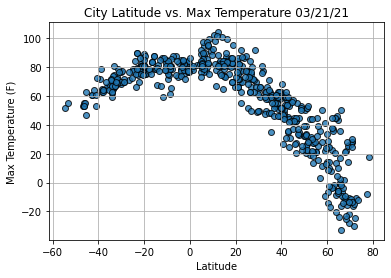

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

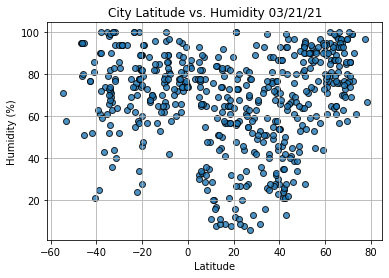

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


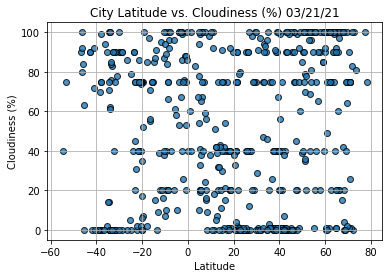

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

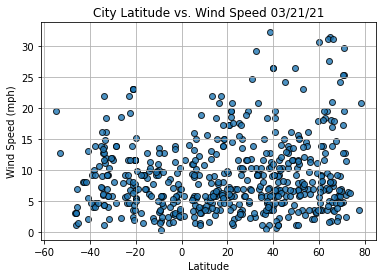

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()